In [9]:
import fastbook
from fastbook import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [3]:
Path.BASE_PATH = path

In [4]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [5]:
(path/"images").ls()

(#7393) [Path('images/japanese_chin_74.jpg'),Path('images/Persian_15.jpg'),Path('images/Maine_Coon_46.jpg'),Path('images/Bengal_168.jpg'),Path('images/american_pit_bull_terrier_171.jpg'),Path('images/Maine_Coon_153.jpg'),Path('images/leonberger_123.jpg'),Path('images/great_pyrenees_44.jpg'),Path('images/newfoundland_45.jpg'),Path('images/chihuahua_18.jpg')...]

In [6]:
fname = (path/"images").ls()[0]

In [7]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['japanese_chin']

In [10]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                get_items = get_image_files,
                splitter = RandomSplitter(seed=42),
                get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                item_tfms = Resize(460),
                batch_tfms = aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/'images')

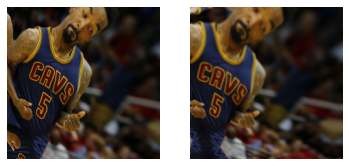

In [11]:
#caption A comparison of fastai's data augmentation strategy (left) and the traditional approach (right).
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
# Place an image in the 'images/grizzly.jpg' subfolder where this notebook is located before running this
dls1 = dblock1.dataloaders([(Path.cwd()/'images'/'grizzly.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);

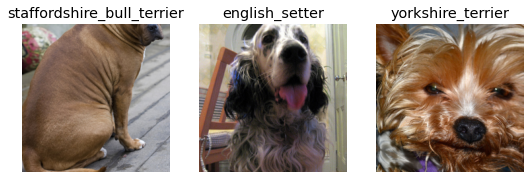

In [12]:
dls.show_batch(nrows=1, ncols=3)

In [13]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.468629,0.305126,0.905954,00:47


epoch,train_loss,valid_loss,accuracy,time
0,0.497607,0.285902,0.916103,00:57
1,0.336439,0.234935,0.929635,00:58


In [14]:
x,y = dls.one_batch()

In [22]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [15]:
y

TensorCategory([31, 33, 19, 36, 30, 12, 15, 13, 32, 28, 35, 26, 33,  4, 26, 35,  6, 28, 10, 21, 31, 36,  0,  5, 16, 31, 31, 25, 23, 15, 13, 29, 24, 19,  9,  0,  4, 12, 19,  0, 13, 16, 31, 20, 35, 20, 10, 19,
        29, 10,  9, 36,  4, 10, 14, 28, 17, 19, 26, 14, 17, 34, 26, 29], device='cuda:0')

In [18]:
x.shape

torch.Size([64, 3, 224, 224])

In [19]:
preds, _ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([8.1046e-07, 2.6279e-08, 4.3612e-06, 9.4631e-07, 1.8195e-05, 2.6803e-06, 1.2504e-07, 9.8170e-06, 7.1943e-05, 5.6052e-05, 7.2784e-08, 9.6715e-08, 4.3745e-07, 3.1878e-07, 1.9598e-06, 1.2101e-07,
        4.2774e-08, 2.1634e-08, 2.2833e-07, 1.0761e-07, 3.5296e-07, 1.2091e-04, 4.5325e-07, 6.8609e-07, 1.9366e-05, 8.3287e-07, 2.6159e-08, 6.0818e-07, 3.9183e-06, 4.9324e-07, 1.1899e-06, 9.9964e-01,
        1.9840e-06, 3.3701e-05, 2.5036e-06, 1.4150e-07, 1.3213e-07])

In [20]:
len(preds[0]), preds[0].sum()

(37, tensor(1.))

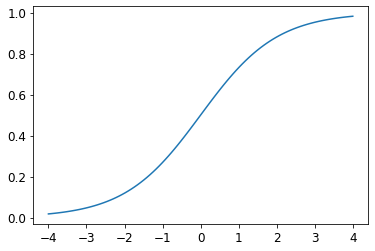

In [21]:
plot_function(torch.sigmoid, min=-4, max=4)

In [23]:
torch.random.manual_seed(42);

In [25]:
acts = torch.randn((6,2))*2
acts

tensor([[ 2.2206, -3.3796],
        [-1.9779,  1.9159],
        [ 2.6443,  1.6344],
        [-1.5317, -1.5012],
        [ 2.7051,  1.3726],
        [-0.6555,  1.5899]])

In [26]:
acts.sigmoid()

tensor([[0.9021, 0.0329],
        [0.1215, 0.8717],
        [0.9337, 0.8368],
        [0.1777, 0.1822],
        [0.9373, 0.7978],
        [0.3417, 0.8306]])

In [29]:
diff = (acts[:,0]-acts[:,1]).sigmoid()

In [30]:
torch.stack([diff, 1-diff], dim=1)

tensor([[0.9963, 0.0037],
        [0.0200, 0.9800],
        [0.7330, 0.2670],
        [0.4924, 0.5076],
        [0.7912, 0.2088],
        [0.0957, 0.9043]])

In [28]:
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [31]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.9963, 0.0037],
        [0.0200, 0.9800],
        [0.7330, 0.2670],
        [0.4924, 0.5076],
        [0.7912, 0.2088],
        [0.0957, 0.9043]])

In [32]:
targ = tensor([0,1,0,1,1,0])

In [33]:
sm_acts

tensor([[0.9963, 0.0037],
        [0.0200, 0.9800],
        [0.7330, 0.2670],
        [0.4924, 0.5076],
        [0.7912, 0.2088],
        [0.0957, 0.9043]])

In [34]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.9963, 0.9800, 0.7330, 0.5076, 0.2088, 0.0957])

In [35]:
df = pd.DataFrame(sm_acts, columns=['3', '7'])
df['targ'] = targ
df['idx'] = idx
df['loss'] = sm_acts[range(6), targ]
t = df.style.hide_index()
t

3,7,targ,idx,loss
0.996316,0.003684,0,0,0.996316
0.019960,0.980040,1,1,0.980040
0.732999,0.267001,0,2,0.732999
0.492392,0.507608,1,3,0.507608
0.791246,0.208754,1,4,0.208754
0.095742,0.904258,0,5,0.095742
